In [72]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import time

In [73]:
myfloat = np.float64

In [81]:
@nb.jit(nopython = True)
def naive_sum_numba(z, epsilon):

    z = myfloat(z)
    epsilon = myfloat(epsilon)
    n = np.around(1/(epsilon*0.9))
    
    result = myfloat(0)
    
    for k in np.arange(1, n):
        
        result += 1/(k*k - k - z)
    
    return result

In [82]:
def naive_sum(z, epsilon):

    z = myfloat(z)
    epsilon = myfloat(epsilon)
    n = np.around(1/(epsilon*0.9))
    
    result = myfloat(0)
    
    for k in np.arange(1, n):
        
        result += 1/(k*k - k - z)
    
    return result

In [83]:
def faster_sum(z, epsilon):

    z = myfloat(z)
    epsilon = myfloat(epsilon)
    n = np.around(np.sqrt(1/(1.8*epsilon)))
    
    result = myfloat(np.pi*np.pi/6)
    
    for k in np.arange(1, n):
        
        result +=  ((k*k)/(k*k-k-z)-1)/(k*k)
        
    return result

In [84]:
@nb.jit(nopython = True)
def faster_sum_numba(z, epsilon):
       
    z = myfloat(z)
    epsilon = myfloat(epsilon)
    n = np.around(np.sqrt(1/(1.8*epsilon)))
    
    result = myfloat(np.pi*np.pi/6)
    
    for k in np.arange(1, n):
        
        result = result + ((1/(k*k-k-z))*(k*k)-1)/(k*k)
    
    return result

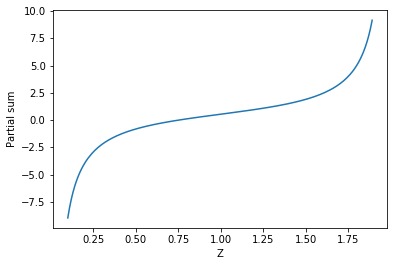

In [85]:
x = np.arange(0.1, 1.9, 0.01)
y = [faster_sum_numba(i, 10**-6) for i in x]

plt.ylabel('Partial sum')
plt.xlabel('Z')
plt.plot(x,y)

In [86]:
# measure speed up from using numba

# parameters
myz = 1
myepsilon = 10**-12

# measure the vanilla python + numpy
start = time.time()
vr = faster_sum(myz,myepsilon)
end = time.time()
vt = end-start

# measure jit compiled function
start = time.time()
nr = faster_sum_numba(myz,myepsilon)
end = time.time()
nt = end-start

print('vanilla python + numpy time:',vt)
print('numba time:',nt)
print('\tspeedup:', vt/nt)
print('')
print('vanilla result', vr)
print('numba result', nr)
print('\tdifference in results:', vr-nr)

vanilla python + numpy time: 0.7542409896850586
numba time: 0.08659195899963379
	speedup: 8.710289019887497

vanilla result 0.5462506241047935
numba result 0.5462506241047935
	difference in results: 0.0


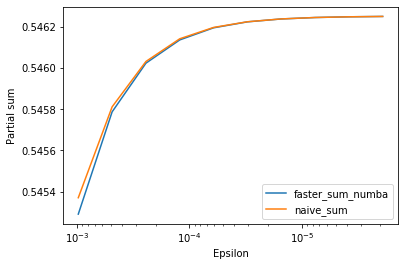

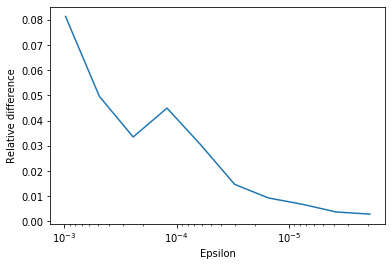

In [87]:
x = [2**-i for i in range(10,20)]
y1 = [faster_sum_numba(1,j) for j in x]
y2 = [naive_sum(1,j) for j in x]

plt.ylabel('Partial sum')
plt.xlabel('Epsilon')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.plot(x,y1,label='faster_sum_numba')
plt.plot(x,y2,label='naive_sum')
plt.legend(loc='lower right')
plt.show()

y3 = [(naive_sum_numba(1,j)-faster_sum_numba(1,j))/j for j in x]

plt.xlabel('Epsilon')
plt.ylabel('Relative difference')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.plot(x,y3)
plt.show()

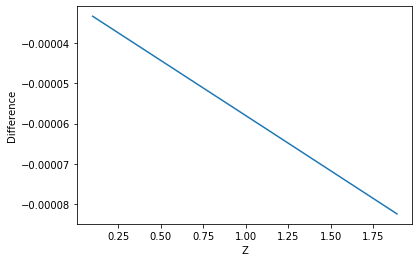

In [89]:
# plot difference of z
myeps = myfloat(10**-3)
x = np.arange(0.1, 1.9, 0.01)
y = [faster_sum_numba(i, myeps)-naive_sum_numba(i, myeps) for i in x]

plt.ylabel('Difference')
plt.xlabel('Z')
plt.plot(x,y)